In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats, interpolate
from scipy.interpolate import CubicSpline
from tqdm import tqdm
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

In [5]:
a = np.load('../solutions/formationchannels.npy')
x = a[:,0]

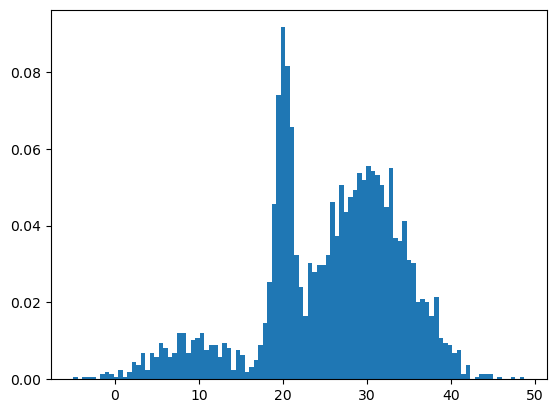

In [6]:
plt.hist(x, bins = 100, density = True)#int(np.round(x.shape[0]**0.5)), density = True)
plt.show()

In [7]:
gm = GaussianMixture(n_components=3, random_state=0, covariance_type='full').fit(a)

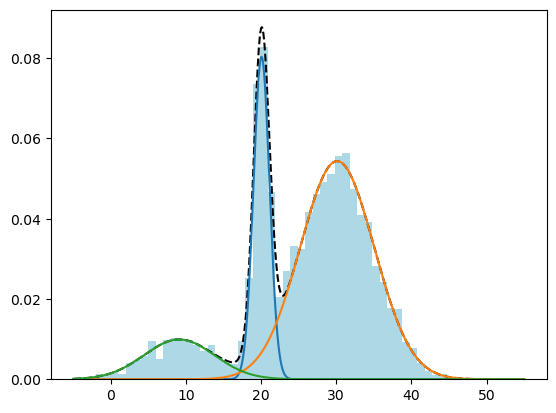

In [8]:
xi = np.linspace(-5, 55, 1000000).reshape(-1,1)
prob = gm.predict_proba(xi)
log_like = gm.score_samples(xi)
pdf = np.exp(log_like)
single_pdf = prob*(pdf[:, np.newaxis])
plt.plot(xi, pdf, color = 'black', linestyle = 'dashed')
plt.plot(xi, single_pdf[:, 0])
plt.plot(xi, single_pdf[:, 1])
plt.plot(xi, single_pdf[:, 2])
plt.hist(x, bins = int(np.round(x.shape[0]**0.5)), density = True, color = 'lightblue')
plt.show()


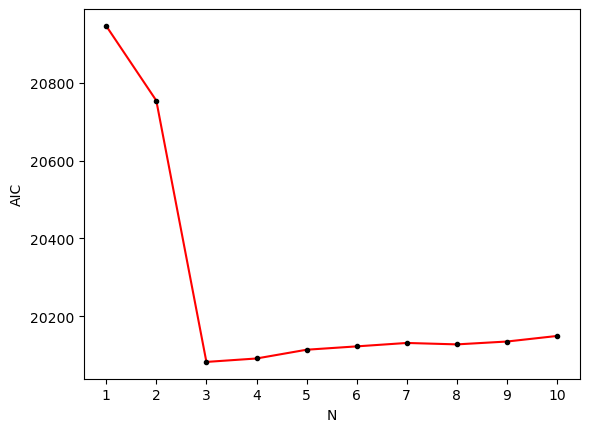

In [9]:
N = 1
aic = np.zeros(10)
n = np.zeros(10)
for i in range(10):
    n[i] = N
    gm = GaussianMixture(n_components=N, random_state=0, covariance_type='full').fit(a)
    aic[i] = gm.aic(a)
    N = N + 1

plt.plot(n, aic, color = 'red', marker = '.', markerfacecolor = 'black', markeredgecolor = 'black')
plt.xlabel('N')
plt.ylabel('AIC')
plt.xticks(n)
plt.show()

SyntaxError: incomplete input (1692162563.py, line 1)